# **Bank Customer's Churn Classification**
*Classifying bank customers based on their previous bank activities, that they will exit/leave the bank or not.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# This code is to Load the dataset from the drive
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Churn_Modelling.csv')

In [2]:
# Loading the dataset from the same directory.
data = pd.read_csv('Churn_Modelling.csv')

# **Exploring the dataset**

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Data Visualization

In [8]:
# Importing essential libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Count Plots.

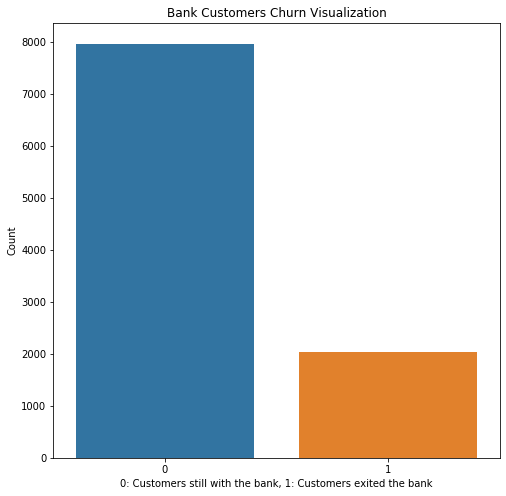

Number of customers who are still with the bank: 7963
Number of customers who have exited the bank: 2037


In [9]:
# Visualizing the count of 'exited customers' in the dataset
plt.figure(figsize=(8,8))
sns.countplot(x='Exited', data=data)
plt.xlabel('0: Customers still with the bank, 1: Customers exited the bank')
plt.ylabel('Count')
plt.title('Bank Customers Churn Visualization')
plt.show()
with_bank, exited_bank = data['Exited'].value_counts()
print('Number of customers who are still with the bank: {}'.format(with_bank))
print('Number of customers who have exited the bank: {}'.format(exited_bank))

From the above plot it is evident that the data is imbalanced.

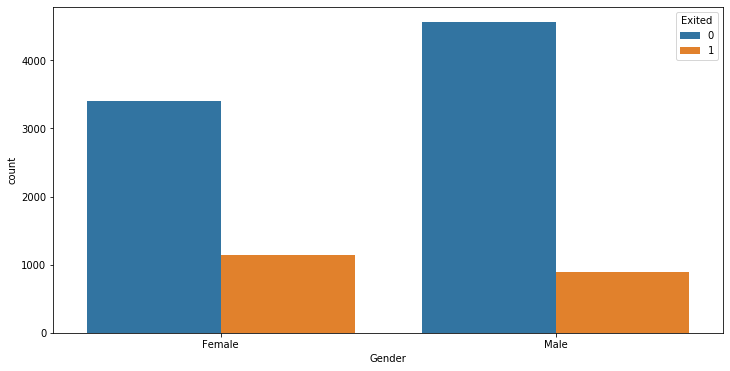

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Gender', hue='Exited')

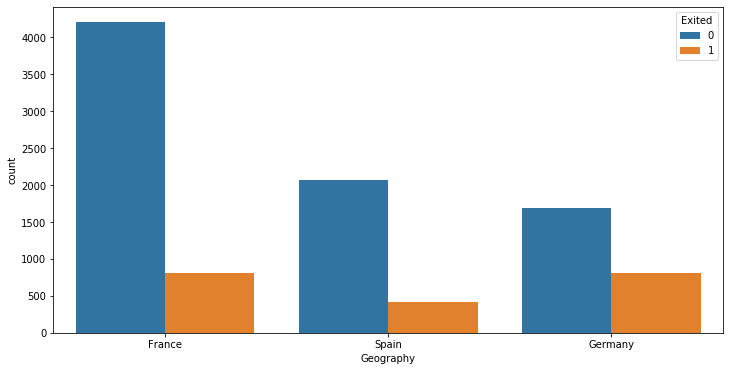

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Geography', hue='Exited')

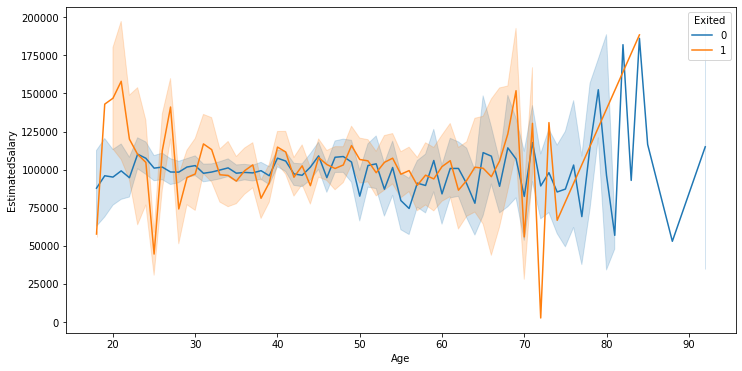

In [12]:
plt.figure(figsize=(12,6))
sns.lineplot(y='EstimatedSalary',x='Age',hue = 'Exited', data=data)
plt.show()

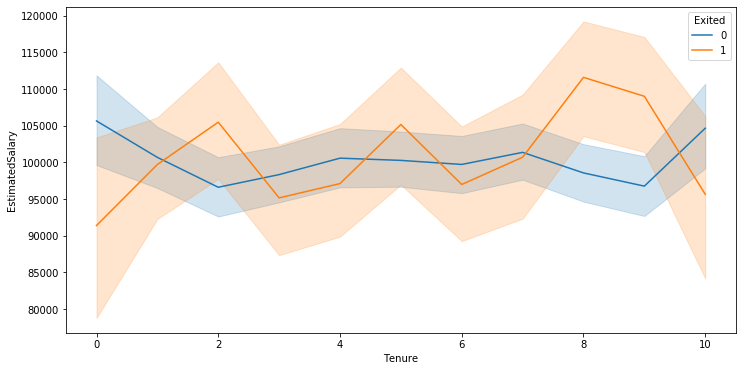

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(y='EstimatedSalary',x='Tenure',hue = 'Exited', data=data)
plt.show()

In [14]:
data.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

Tha data has no null values.

In [15]:
# Dropping redundant columns
data = data.drop(['Surname','RowNumber', 'CustomerId', 'NumOfProducts'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,1,0,113931.57,1
3,699,France,Female,39,1,0.00,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


# **Feature Engineering**

*Converting categorical features into numerical features using label encoding.

In [16]:
# Creating dummy variables for "Geography"
geography = pd.get_dummies(data['Geography'])
# Appending columns to original dataframe
data = pd.concat([data, geography], axis=1)
# Dropping the Geography variable since we have dummies.
data = data.drop('Geography', axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,Female,42,2,0.00,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,79084.10,0,0,0,1


In [17]:
data_categorical = data.select_dtypes(include=['object'])
# checking the data just to be sure
data_categorical.head()

,Gender
0,Female
1,Female
2,Female
3,Female
4,Female


In [18]:
# Encoding the features with Label Encoder
from sklearn.preprocessing import LabelEncoder
# applying the Encoder to the diabetes_categorical
le = LabelEncoder()
data_categorical = data_categorical.apply(le.fit_transform)
# display first 5 rows of the dataset to verify the above update
data_categorical.head()

,Gender
0,0
1,0
2,0
3,0
4,0


In the above update
- ***Gender***
    - '0' represents 'Female'
    - '1' represents 'Male'


In [19]:
# dropping the variable Gender since we have the encoded data ready.
data = data.drop('Gender', axis=1)
data.columns 

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'France', 'Germany',
       'Spain'],
      dtype='object')

In [20]:
# Appending updated columns to original dataframe
data = pd.concat([data, data_categorical], axis=1)
data.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Gender
0,619,42,2,0.00,1,1,101348.88,1,1,0,0,0
1,608,41,1,83807.86,0,1,112542.58,0,0,0,1,0
2,502,42,8,159660.80,1,0,113931.57,1,1,0,0,0
3,699,39,1,0.00,0,0,93826.63,0,1,0,0,0
4,850,43,2,125510.82,1,1,79084.10,0,0,0,1,0


# **Data Preprocessing**

*• Split the dataset into independent features (ie: X) and label (ie: y).*

*• Split the dataset further into train and test sets.*

*• Using Oversampling technique to balance the data.*

*• Apply feature scaling to train and test sets of independent features.*

In [21]:
X = data.drop('Exited', axis=1)
y = data['Exited']

In [22]:
# Splitting the dataset into train and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (8000, 11), X_test size: (2000, 11)


In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# **Building Artificial Neural Network (ANN)**

In [26]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [27]:
# Initialising the ANN
classifier = Sequential()

In [28]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

In [29]:
# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

In [30]:
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [31]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train_scaled, y_train, batch_size=10, validation_split=0.33, epochs=100)

Epoch 1/100
536/536 [==============================] - 12s 2ms/step - loss: 0.5952 - accuracy: 0.7223 - val_loss: 0.4742 - val_accuracy: 0.8031
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4555 - accuracy: 0.8061 - val_loss: 0.4514 - val_accuracy: 0.7997
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4310 - accuracy: 0.8180 - val_loss: 0.4438 - val_accuracy: 0.8050
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4196 - accuracy: 0.8211 - val_loss: 0.4397 - val_accuracy: 0.8016
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4090 - accuracy: 0.8281 - val_loss: 0.4372 - val_accuracy: 0.8046
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4287 - accuracy: 0.8154 - val_loss: 0.4359 - val_accuracy: 0.8065
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4083 - accuracy: 0.8253 - val_loss: 0.4327 - val_accuracy: 0.811

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3964 - accuracy: 0.8340 - val_loss: 0.4081 - val_accuracy: 0.8262
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3878 - accuracy: 0.8362 - val_loss: 0.4100 - val_accuracy: 0.8270
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3706 - accuracy: 0.8466 - val_loss: 0.4084 - val_accuracy: 0.8273
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4096 - accuracy: 0.8295 - val_loss: 0.4111 - val_accuracy: 0.8251
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3995 - accuracy: 0.8334 - val_loss: 0.4083 - val_accuracy: 0.8273
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3964 - accuracy: 0.8318 - val_loss: 0.4079 - val_accuracy: 0.8281
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3952 - accuracy: 0.8322 - val_loss: 0.4095 - val_accuracy:

In [33]:
# List all data in history
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

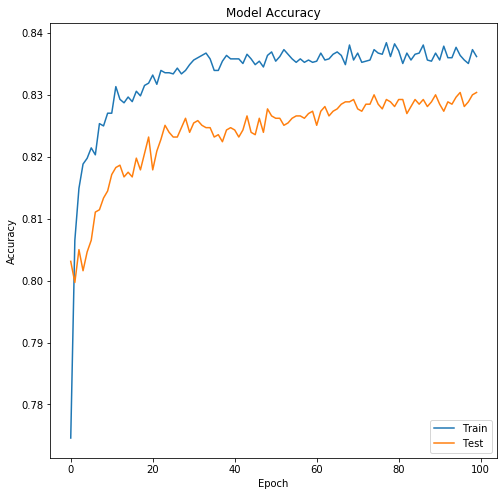

In [34]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

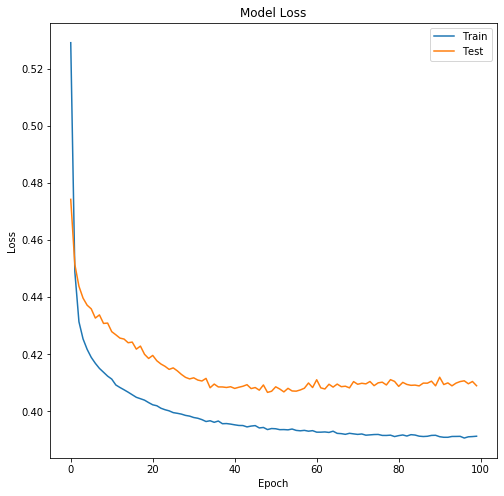

In [35]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# **Model Evaluation**

In [36]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_scaled)

In [37]:
y_pred

array([[0.21702531],
       [0.27104563],
       [0.19116974],
       ...,
       [0.1194723 ],
       [0.13715935],
       [0.1417537 ]], dtype=float32)

In [38]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1552,   43],
       [ 272,  133]], dtype=int64)

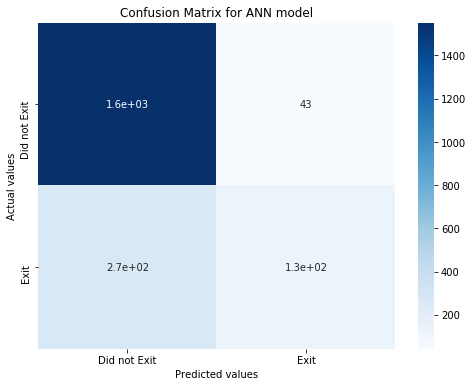

In [40]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['Did not Exit', 'Exit'], yticklabels=['Did not Exit', 'Exit'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [41]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print('The accuracy for ANN model is: {}%'.format(score*100))

The accuracy for ANN model is: 84.25%


# **Predictions**

In [43]:
def predict_exit(sample_value):
  
  # Convert list to numpy array
  sample_value = np.array(sample_value)

  # Reshape because sample_value contains only 1 record
  sample_value = sample_value.reshape(1, -1)

  # Feature Scaling
  sample_value = sc.transform(sample_value)

  return classifier.predict(sample_value)

In [44]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','HasCrCard','IsActiveMember','EstimatedSalary','France','Germany','Spain','Gender'.
sample_value = [738, 25, 2, 83008.31,0, 1, 42766.03, 1, 0, 0, 1]
if predict_exit(sample_value)>0.5:
  print('Prediction: High chances of exit!')
else:
  print('Prediction: Low chances of exit.')

Prediction: Low chances of exit.


In [45]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','HasCrCard','IsActiveMember','EstimatedSalary','France','Germany','Spain','Gender'.
sample_value = [345, 65, 8, 420.5,1, 0, 20000, 0, 1, 0, 0]
if predict_exit(sample_value)>0.5:
  print('Prediction: High chances of exit!')
else:
  print('Prediction: Low chances of exit.')

Prediction: High chances of exit!


In [46]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','HasCrCard','IsActiveMember','EstimatedSalary','France','Germany','Spain','Gender'.
sample_value = [874, 65, 8, 420.5,1, 0, 25000, 0, 1, 0, 0]
if predict_exit(sample_value)>0.5:
  print('Prediction: High chances of exit!')
else:
  print('Prediction: Low chances of exit.')

Prediction: High chances of exit!
